In [60]:
# 📚 Basic Libraries
import numpy as np # operaciones matemáticas (numerical python)
import pandas as pd # manipulación de datos
import warnings # nobody likes warnings

# 📊 Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# 🤖 Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import roc_curve, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report 

In [61]:
df = pd.read_csv("C:/Users/igara/Ironhack Bootcamp/Bootcamp ironhack week5/Proyect/king_ country_ houses_aa.csv/king_ country_ houses_aa.csv")

In [62]:
df.shape

(21613, 21)

In [63]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [64]:
min(df.price)

75000.0

In [65]:
max(df.grade)

13

In [66]:
df.waterfront.value_counts()

waterfront
0    21450
1      163
Name: count, dtype: int64

In [67]:
df["date"]=pd.to_datetime(df["date"])

In [68]:
data=df.copy()

In [69]:
data["year"]=pd.to_datetime(data["date"]).dt.year
data["year"]=data["year"].astype(int)

In [70]:
data["month"]=pd.to_datetime(data["date"]).dt.month
data["month"]=data["month"].astype(int)


In [71]:
data["day"]=pd.to_datetime(data["date"]).dt.day
data["day"]=data["day"].astype(int)

In [72]:
data=data.drop("date",axis=1)

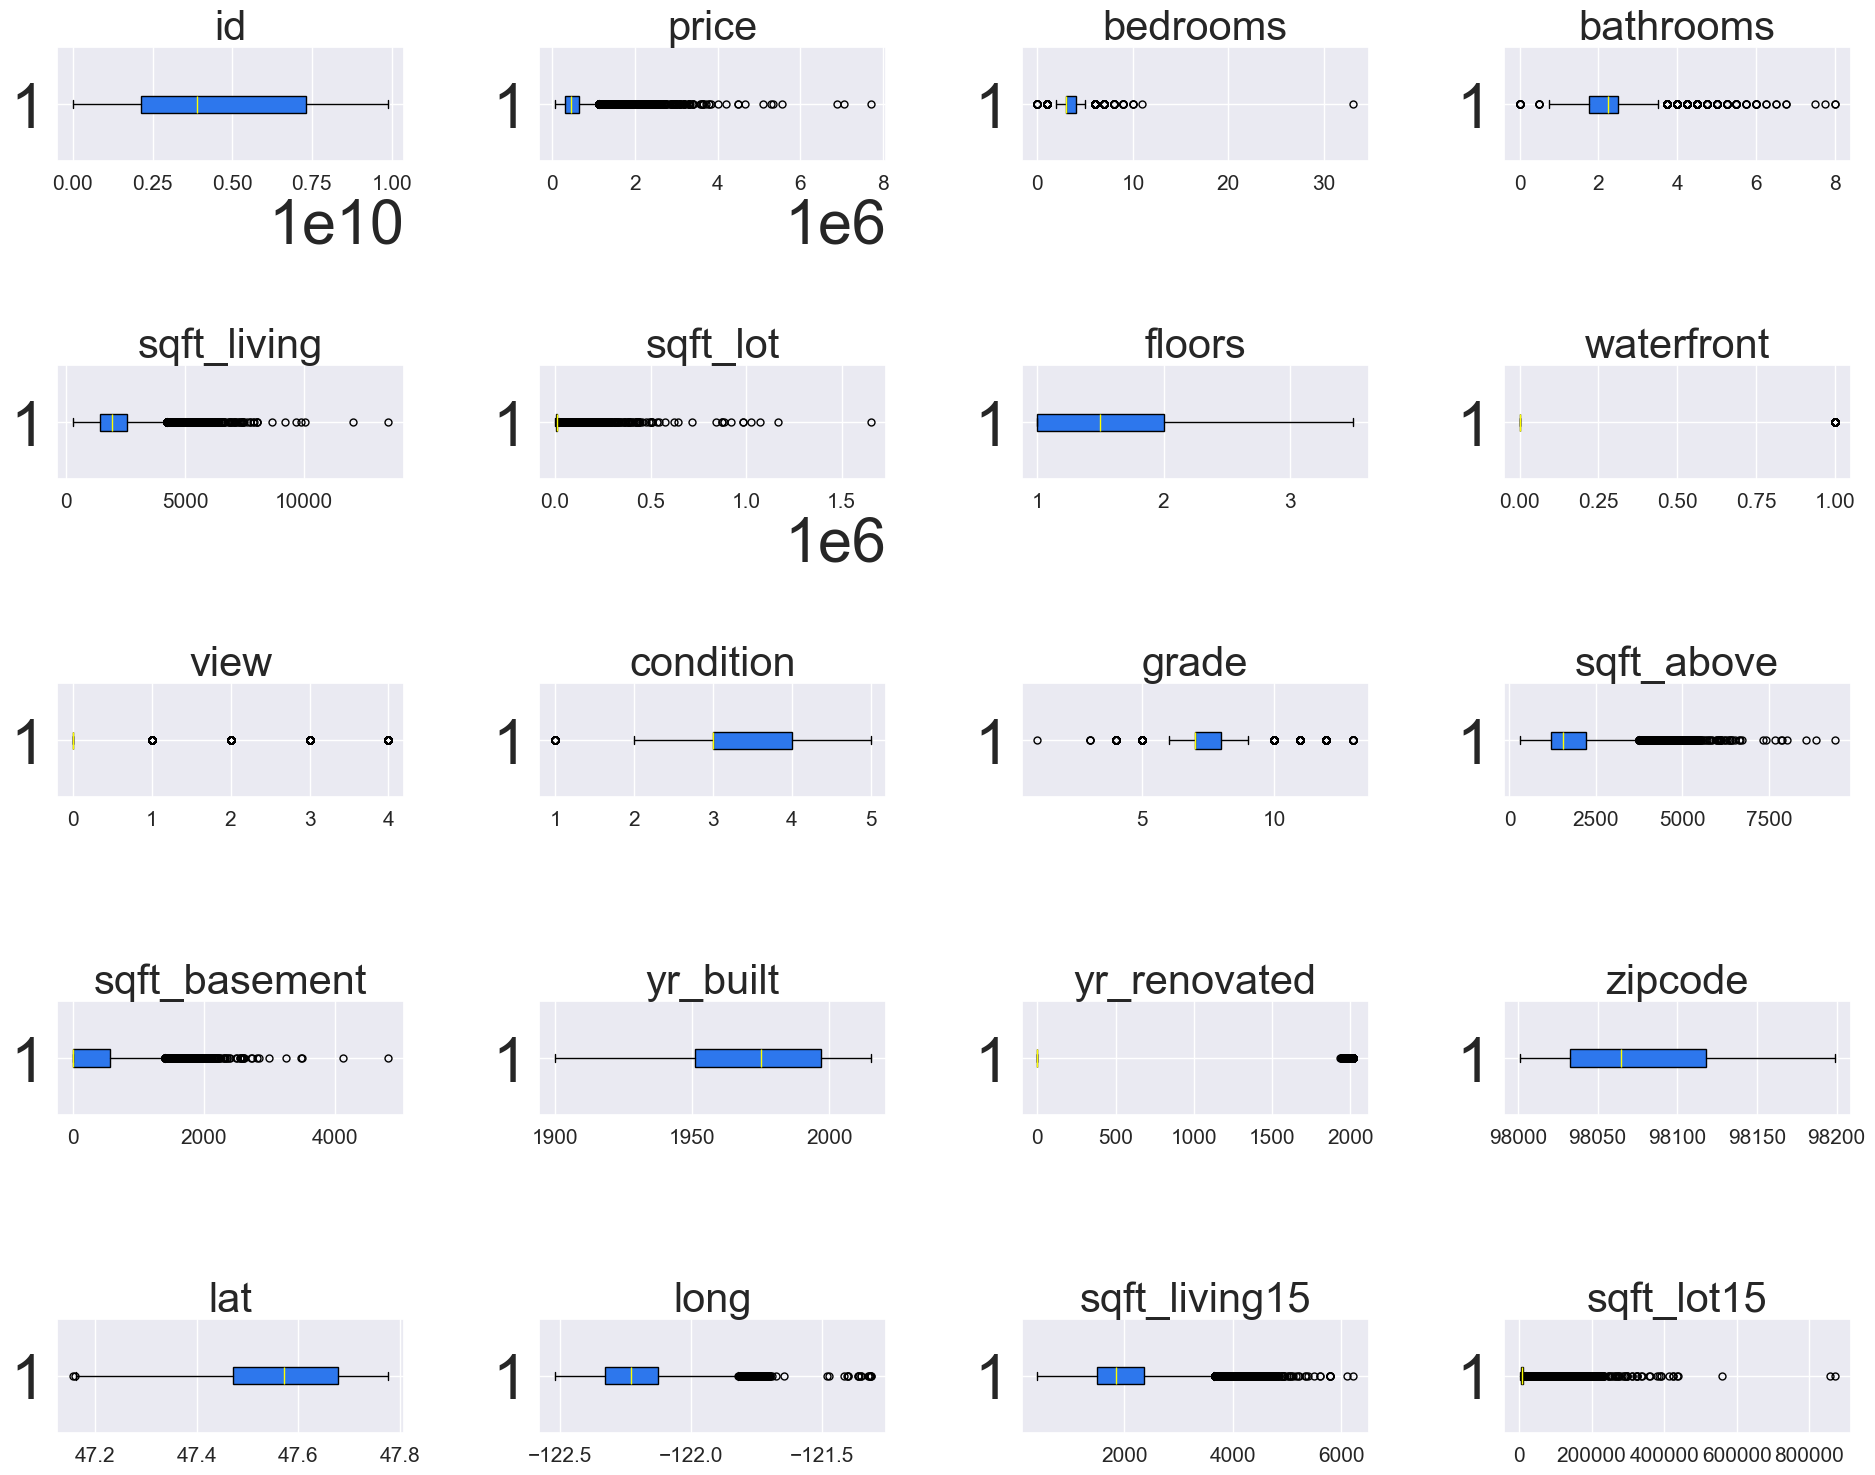

In [73]:
color = "#2d77ed"

nrows, ncols = 5, 4 

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

for i, ax in enumerate(axes):
    if i >= len(data.columns):
        ax.set_visible(False)
        continue
    ax.boxplot(data.iloc[:, i].dropna(), vert=False, patch_artist=True, 
               boxprops=dict(facecolor=color, color='black'), 
               medianprops=dict(color='yellow'), whiskerprops=dict(color='black'), 
               capprops=dict(color='black'), flierprops=dict(marker='o', color='red', markersize=5))
    ax.set_title(data.columns[i], fontsize=30)
    ax.tick_params(axis='x', labelsize=15)

plt.tight_layout()
plt.show()

In [74]:
# for col in data.select_dtypes(float).columns:
    # data[col]=data[col].astype(int)

In [75]:
data=data[data["price"]>=650000]
data.shape

(5324, 23)

In [76]:
num = data.select_dtypes(include="number")
num.corr(method="pearson")["price"].sort_values(ascending=False)

price            1.000000
sqft_living      0.606785
grade            0.507540
sqft_above       0.466491
bathrooms        0.463425
sqft_living15    0.373555
view             0.339276
waterfront       0.311155
sqft_basement    0.286972
bedrooms         0.200773
floors           0.126395
yr_renovated     0.107088
sqft_lot15       0.038211
sqft_lot         0.032126
yr_built         0.031424
year             0.008067
condition        0.003919
month           -0.003092
lat             -0.010190
day             -0.018273
id              -0.051214
long            -0.082112
zipcode         -0.083414
Name: price, dtype: float64

In [77]:
num.corr(method="spearman")["price"].sort_values(ascending=False)

price            1.000000
sqft_living      0.533307
grade            0.513555
bathrooms        0.403877
sqft_above       0.401559
sqft_living15    0.392846
view             0.287285
bedrooms         0.225767
sqft_lot         0.218151
sqft_lot15       0.217053
sqft_basement    0.192247
waterfront       0.178589
floors           0.161181
yr_renovated     0.114592
yr_built         0.056283
year             0.009236
day             -0.006273
month           -0.013573
condition       -0.015858
lat             -0.053395
long            -0.069248
id              -0.075469
zipcode         -0.109269
Name: price, dtype: float64

In [78]:
df.price.mean()

540088.1417665294

In [79]:
num_corr=round(data.corr(), 2)

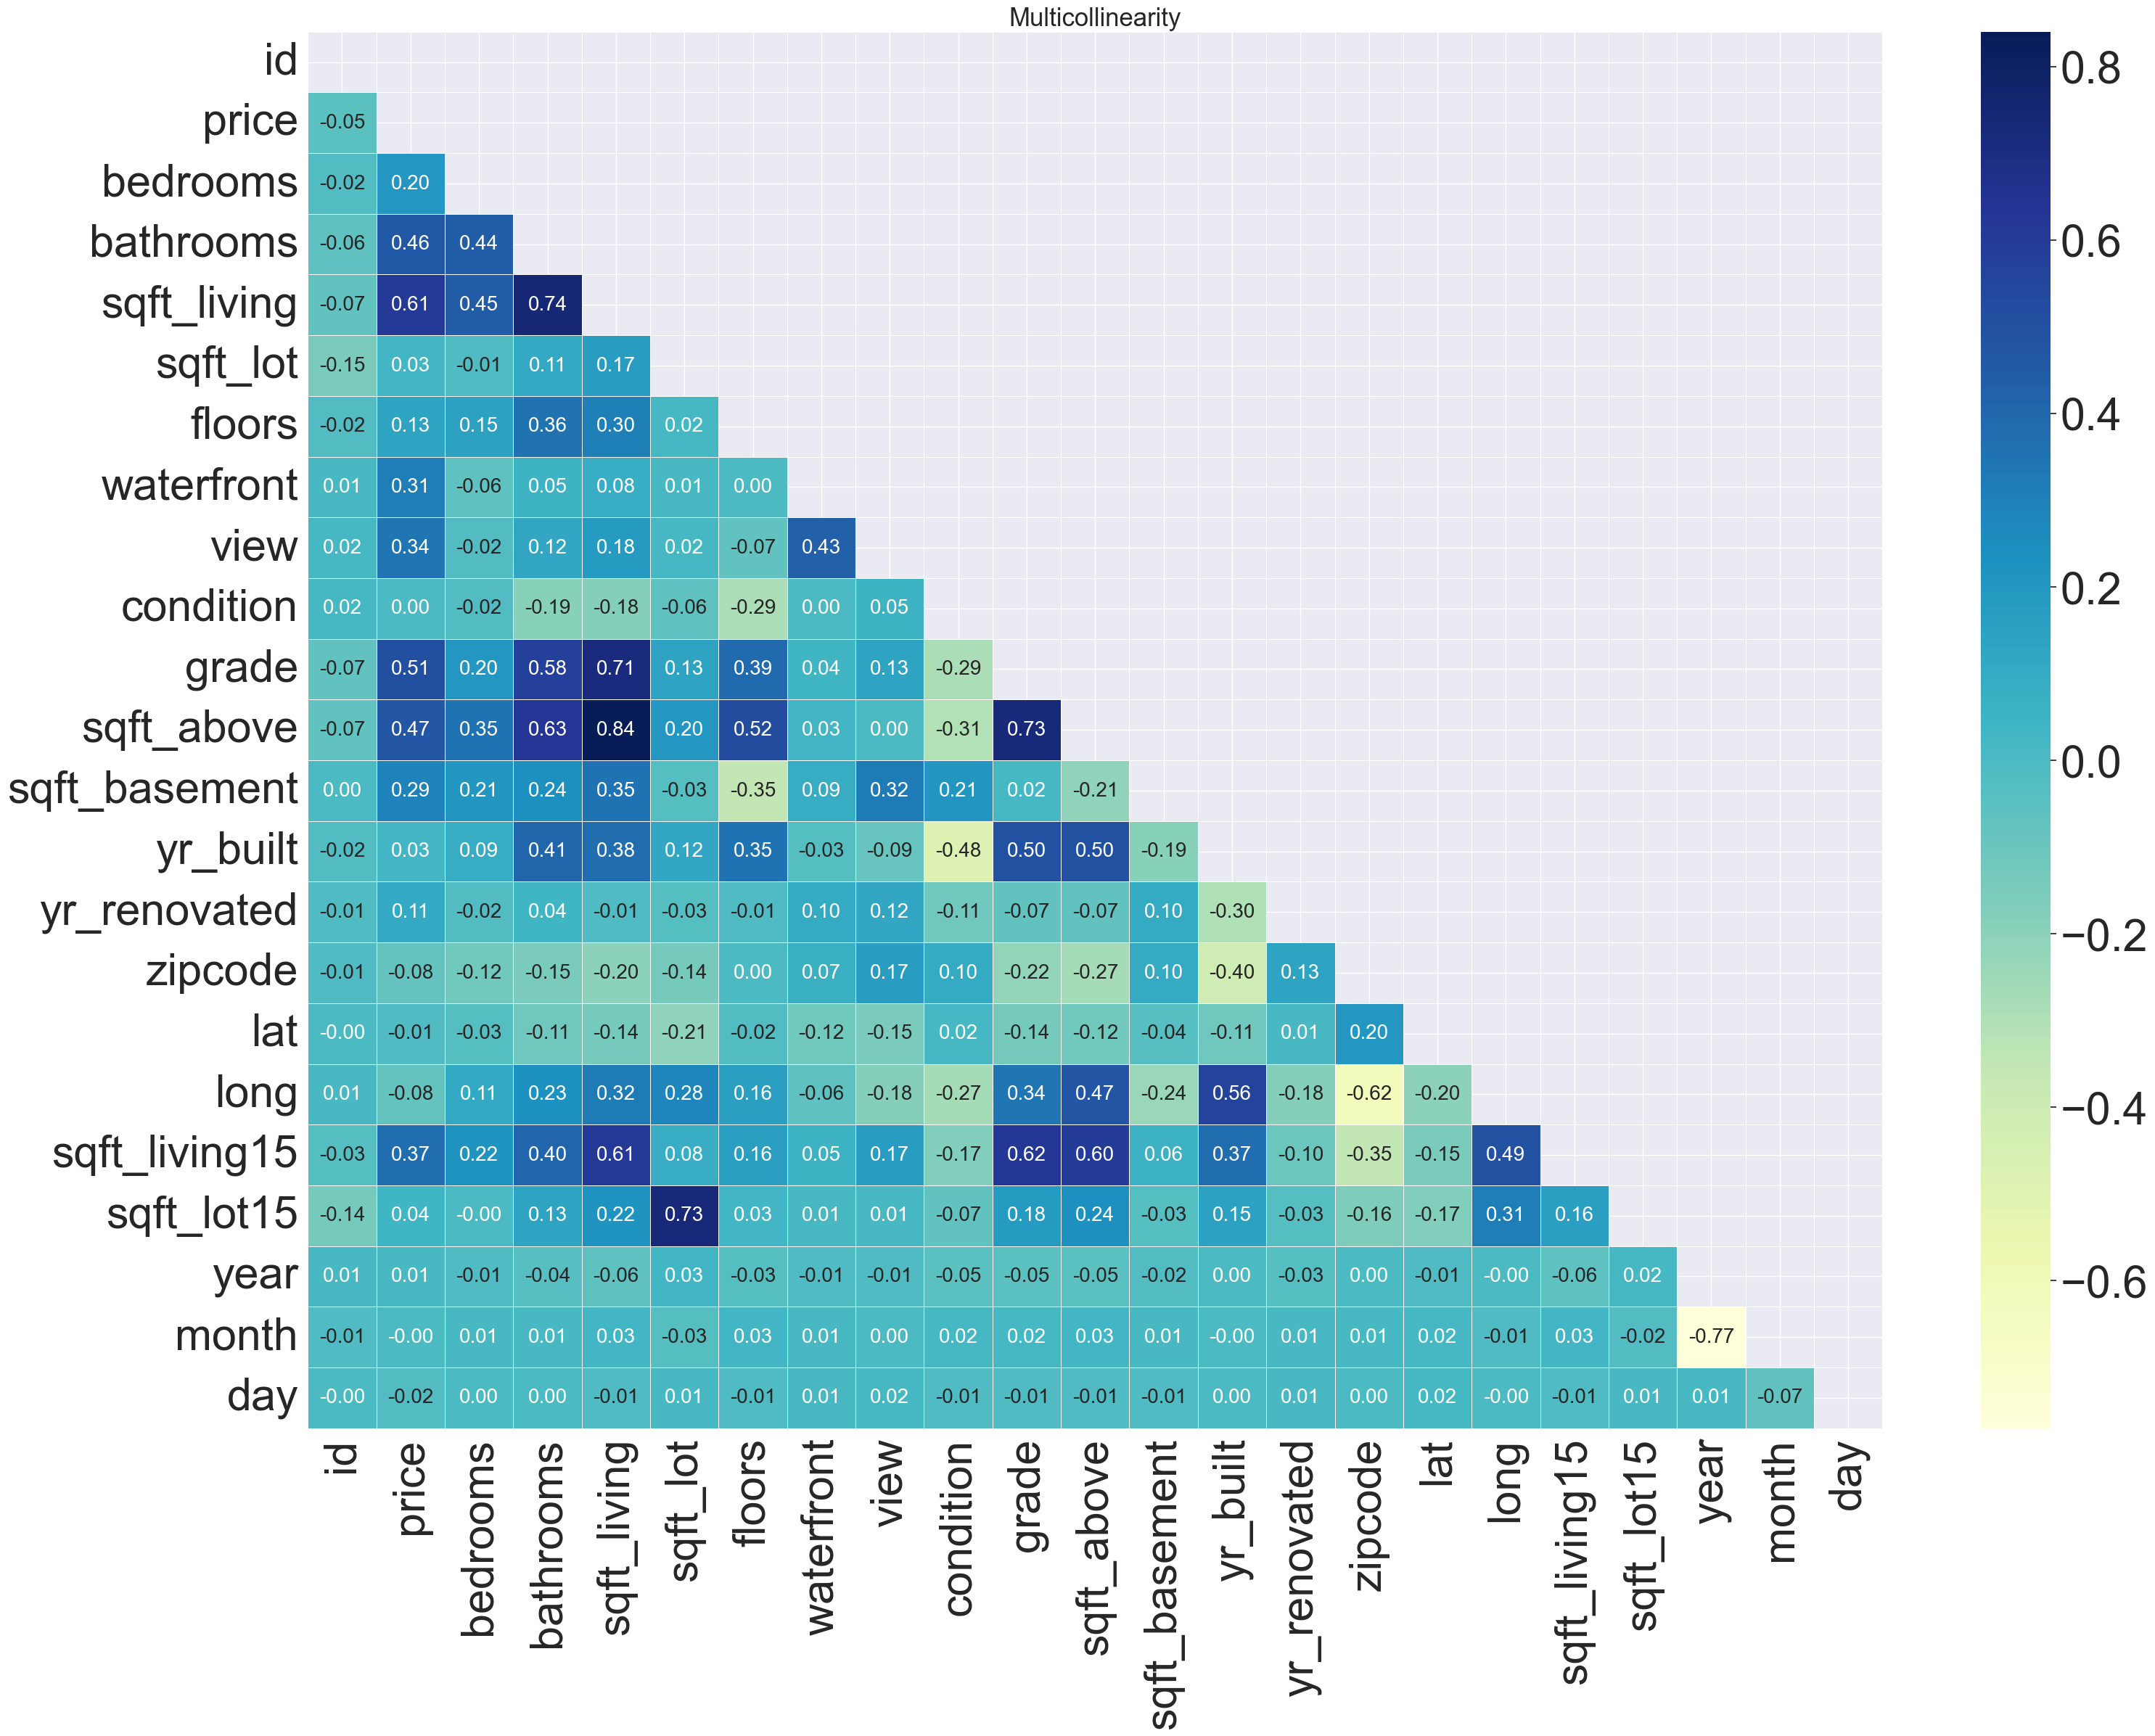

In [80]:
mask = np.zeros_like(num_corr)
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(35, 25))
sns.set(font_scale=4) 

ax = sns.heatmap(num_corr, mask=mask, annot=True, annot_kws={"size": 20}, linewidths=.5, cmap="YlGnBu", fmt=".2f", ax=ax) # round to 2 decimal places
ax.set_title("Multicollinearity", fontsize=25) 
plt.show()

In [81]:
data=data.drop(columns=["id","year","month","day","zipcode"])

In [82]:
data=data.drop(columns=["sqft_above"])
# eliminada ya que esta muy relacionada con sqft living lo que puede provocar
# inforacion redundante y causar malas interpretaciones de los datos
# elimine esta y no living ya que living representa el area total habitable
# lo cual es mi interpretacion es un dato mas complejo y significativo que 
#  sqft above que representa lo mismo pero sin el sotano
# digo esto en base al valor de correlacion con price que living tiene.70 y above .61

In [83]:
# data.to_csv("C:/Users/igara/Ironhack Bootcamp/Bootcamp ironhack week5/Proyect/king_ country_ houses_aa.csv/king_ country_ houses_aa2.csv", index=False)